In [16]:
import csv

data = [
    ["Name", "Age", "City"],
    ["Alice", 30, "New York"],
    ["Bob", 25, "Los Angeles"],
    ["Charlie", 35, "Chicago"]
]

with open('sample.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

print("CSV file created successfully.")

CSV file created successfully.


In [17]:
import csv
with open('sample.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)

['Name', 'Age', 'City']
['Alice', '30', 'New York']
['Bob', '25', 'Los Angeles']
['Charlie', '35', 'Chicago']


In [20]:
import pandas as pd


data = {
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [10, 20, 30, 40, 50],
    'target': [0, 1, 0, 1, 0]
}


df = pd.DataFrame(data)


df.to_csv('data.csv', index=False)


   Feature1  Feature2  target
0         1        10       0
1         2        20       1
2         3        30       0
3         4        40       1
4         5        50       0
[[0 1]
 [1 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



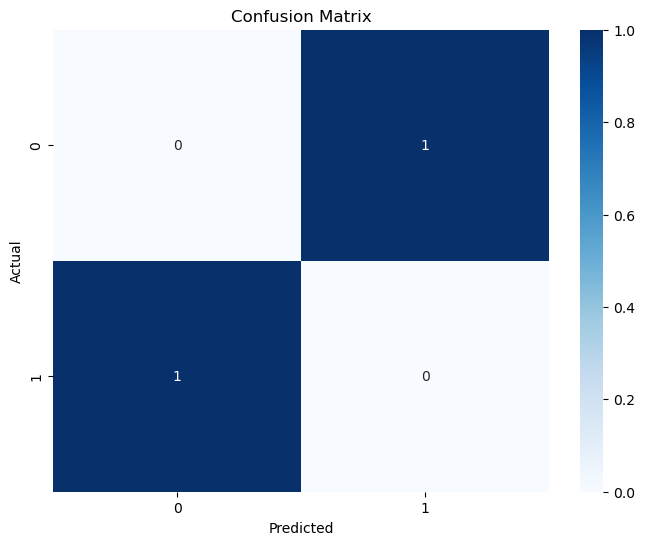

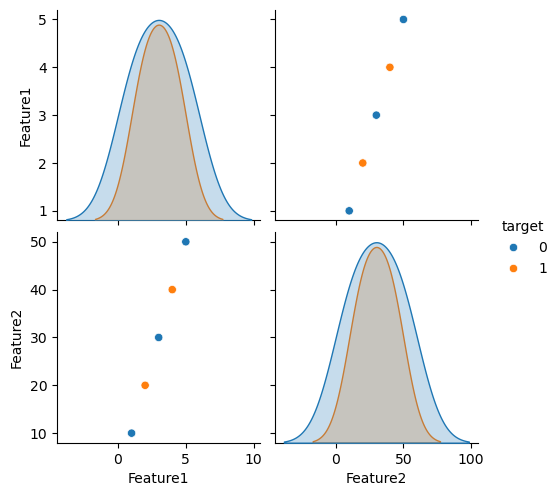

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data.csv') 

print(data.head())

data = data.dropna()

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = SVC(class_weight='balanced')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


sns.pairplot(data, hue='target')
plt.show()
